## Support Vector Machines

In [1]:
#Imports 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification, make_blobs

sns.set_theme(style="whitegrid")

## The Model

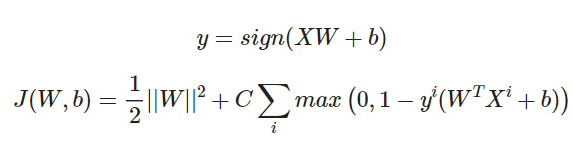

## Soft SVM Implementation

In [2]:
class softSVM:
    def __init__(self, C):
        self._support_vectors = None
        self.C = C
        self.w = None
        self.b = None
        self.X = None
        self.y = None

        self.n = 0 # Number of data points
        self.d = 0 # Number of dimensions

    def __decision_function(self,  X):
        return X.dot(self.w) + self.b

    def __cost(self, margin):
        return (1/2) * self.w.dot(self.w) + self.C * np.sum(np.maximum(0, 1 - margin))

    def __margin(self, X, y):
        return y * self.__decision_function(X)

    def fit(self, X, y, lr=1e-3, epochs=500):
        #Initialise w and b
        self.n, self.d = X.shape
        self.w = np.random.randn(self.d)
        self.b = 0

        #Required only for plotting 
        self.X = X
        self.y = y

        losses = []

        for _ in range(epochs):
            margin = self.__margin(X, y)
            loss = self.__cost(margin)
            losses.append(loss)

            misclassified_pts_idx = np.where(margin < 1)[0]
            dJdw = self.w - self.C * y[misclassified_pts_idx].dot(X[misclassified_pts_idx])
            self.w -= lr * dJdw

            dJdb = -1 * self.C * np.sum(y[misclassified_pts_idx])
            self.b -= lr * dJdb

        self._support_vectors = np.where(self.__margin(X, y) <= 1.0)[0] 
        
    def predict(self, X):
        return np.sign(self.__decision_function(X))

    def score(self, X, y):
        pred = self.predict(x)
        return np.mean(y==pred)

    def plot_decision_boundary(self):
        plt.figure(figsize=(8,8))
        plt.scatter(self.X[:,0], self.X[:, 1], c = self.y, marker = 'o', s = 100, cmap = 'autumn')
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        # Create a grid to evaluate the model
        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = self.__decision_function(xy).reshape(XX.shape)

        ## Plot decision boundary and margins
        ax.contour(XX, YY, Z, colors=['g', 'k', 'g'], levels = [-1, 0, 1],
                    linestyles = ['--', '-', '--'], linewidths = [2.0, 2.0, 2.0])

        # Highlight the support vectors
        ax.scatter(self.X[:, 0][self._support_vectors],
                    self.X[:, 1][self._support_vectors], s =250,
                    linewidth = 1, facecolors='none', edgecolors='k')

        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.show()

## Demo 1: Linearly seperable data

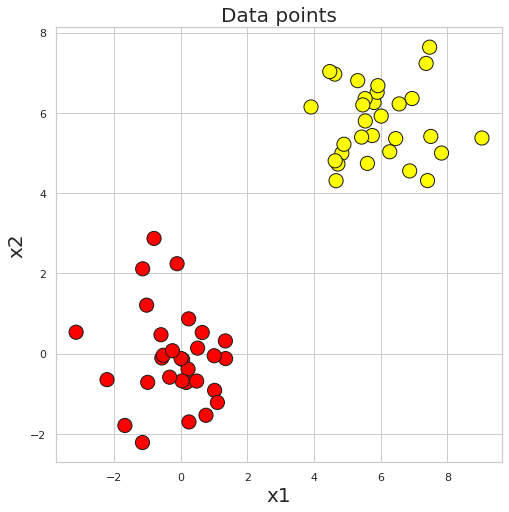

In [3]:
X, Y = make_blobs(n_samples = 60,
                    n_features = 2,
                    centers = [[0,0],[6,6]],
                    cluster_std = 1,
                    random_state = 12)

Y = np.where(Y == 0, -1, 1)

plt.figure(figsize=(8,8))

plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, s=200, edgecolor='k', cmap='autumn')
plt.xlabel('x1', fontsize = 20)
plt.ylabel('x2', fontsize = 20)
plt.title('Data points', fontsize=20)
plt.show()

[0.32041091 0.24116331]


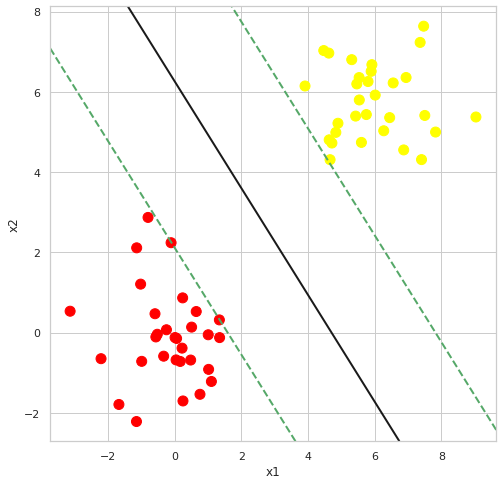

In [4]:
svm = softSVM(C = 1)
svm.fit(X, Y)

print(svm.w)

def get_hyperplane_value(x, w, b, offset):
    return -1 * (w[0] * x + b + offset) / w[1]

svm.plot_decision_boundary()

## Demo 2: Linearly seperable with noise

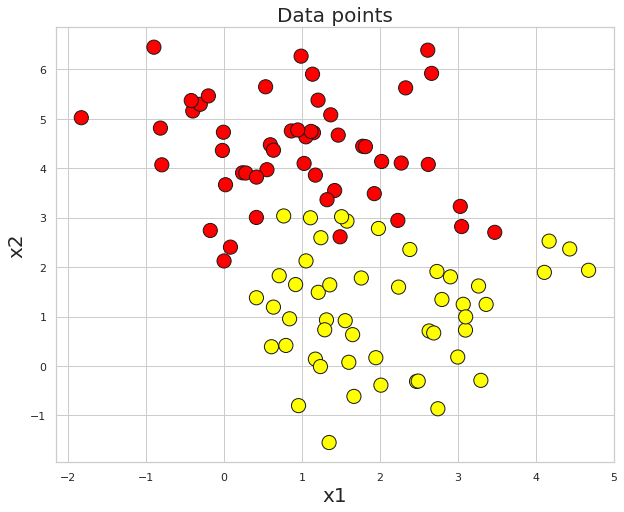

In [5]:
X, y = make_blobs(n_samples=100,
                    centers = 2,
                    random_state=0,
                    cluster_std=1.1)

plt.figure(figsize=(10,8))

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=200, edgecolor='k', cmap='autumn')
plt.xlabel('x1', fontsize = 20)
plt.ylabel('x2', fontsize = 20)
plt.title('Data points', fontsize=20)
plt.show()

[ 0.33041952 -1.57617973] 3.730000000000005


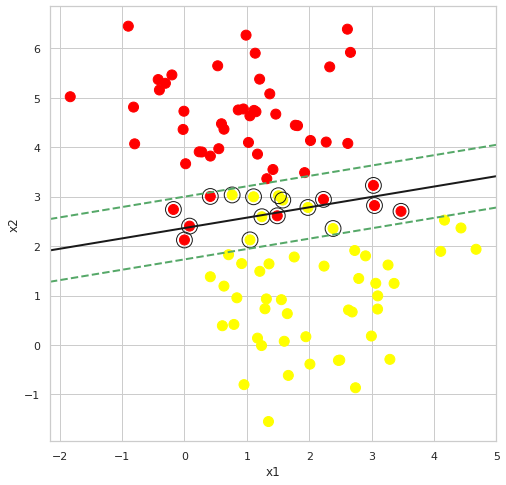

In [6]:
y[ y == 0] = -1 
svm = softSVM(C=10)
svm.fit(X, y)
print(svm.w, svm.b)

svm.plot_decision_boundary()

In [7]:
y

array([ 1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,
       -1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1,
        1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,
        1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1,
        1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1,
       -1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1])

[ 0.23535978 -7.85949675] 20.200000000000006


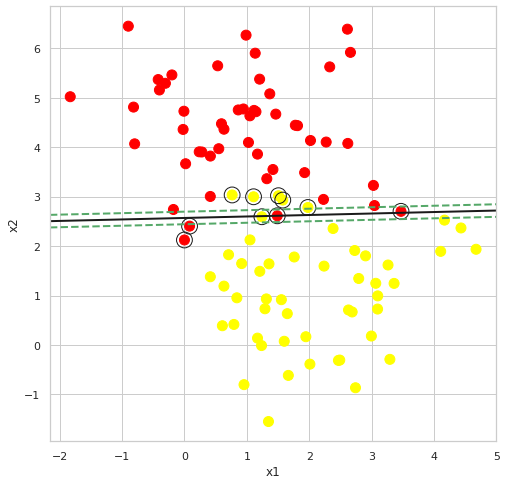

In [8]:
svm = softSVM(C=100)
svm.fit(X, y)
print(svm.w, svm.b)

svm.plot_decision_boundary()

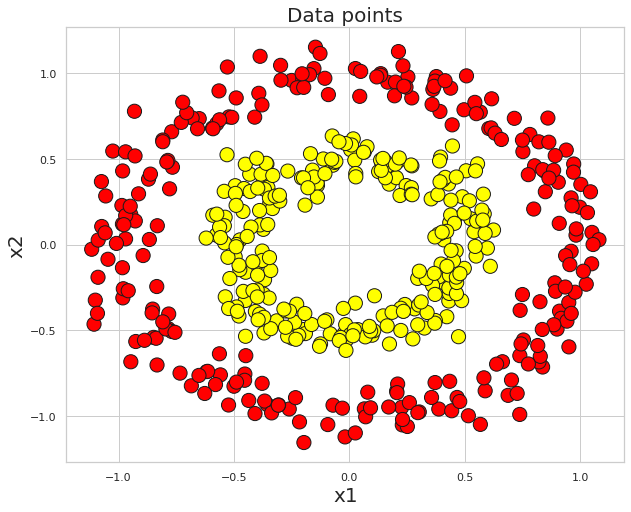

In [11]:
from sklearn.datasets import make_circles
X, y = make_circles(500, factor=0.5, noise = 0.08)
y[y == 0] = -1

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], marker='o', c = y, s =200, edgecolors='k', cmap='autumn')
plt.xlabel('x1', fontsize=20)
plt.ylabel('x2', fontsize=20)
plt.title('Data points', fontsize=20)
plt.show()

<Figure size 576x576 with 0 Axes>

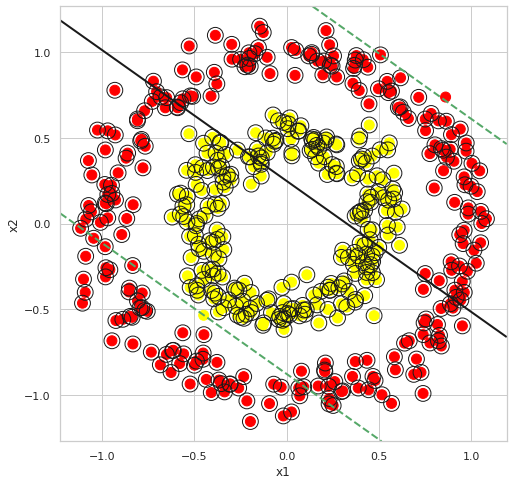

In [12]:
y[y == 0] = -1
svm = softSVM(C = 10)
svm.fit(X, y)

fig = plt.figure(figsize = (8,8))
svm.plot_decision_boundary()

## Kernel SVM

In [13]:
class SVMDualProblem:
    def __init__(self, C=1.0, kernel ='rbf', sigma=0.1, degree=2):
        self.C = C
        if kernel == 'poly':
            self.kernel = self._polynomial_kernel
            self.c = 1
            self.degree = degree

        else:
            self.kernel = self._rbf_kernel
            self.sigma = sigma

        self.X = None
        self.y = None
        self.alpha = None
        self.b = 0
        self.ones = None

    def _rbf_kernel(self, X1, X2):
        return np.exp(-(1/self.sigma **2) * np.linalg.norm(X1[:, np.newaxis] - X2[np.newaxis, :]), axis = 2)

    def _polynomial_kernel(self, X1, X2):
        return (self.c + X1.dot(X2.T)) ** self.degree

    def fit(self, X, y, lr = 1e-3, epochs=100):
        self.X = X
        self. y = y

        self.alpha = np.random.random(X.shape[0])
        self.b = 0
        self.ones = np.ones(X.shape[0])

        y_iy_jk_ij = np.outer(y, y) * self.kernel(X, X)

        losses = []

        for _ in range(epochs):
            gradient = self.ones - y_iy_jk_ij.dot(self.alpha)

            self.alpha = self.alpha + lr * gradient

            self.alpha[self.alpha > self.C] = self.C
            self.alpha[self.alpha < 0] = 0

            loss = np.sum(self.alpha) - 0.5 * np.sum(np.outer(self.alpha, self.alpha) * y_iy_jk_ij) 
            losses.append(loss)

        index = np.where((self.alpha > 0) & (self.alpha < self.C))[0]
        b_i = y[index] - (self.alpha * y).dot(self.kernel(X, X[index]))
        self.b = np.mean(b_i)

        plt.plot(losses)
        plt.title("loss per epochs")
        plt.show()

    def _decision_function(self, X):
        return (self.alpha * self.y).dot(self.kernel(self.X, X)) + self.b

    def predict(self, X):
        return np.sign(self._decision_function(X))

    def score(self, X, y):
        y_hat = self.predict(X)
        return np.mean(y == y_hat)

    def plot_decision_boundary(self):
        plt.scatter(self.X[:, 0], self.X[:, 1], c = self.y, s = 50, cmap = plt.cm.Paired, alpha = 0.5)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = self._decision_function(xy).reshape(XX.shape)

        ax.contour(XX, YY, Z, colors=['b', 'g', 'r'], levels =[-1, 0, 1], alpha = 0.5,
                    linestyles=['--', '-', '--'], linewidths = [2.0, 2.0, 2.0])

        ax.scatter(self.X[:, 0][self.alpha > 0.],
                    self.X[:, 1][self.alpha > 0.], s =50,
                    linewidth = 1, facecolors='none', edgecolors='k')

        plt.show()

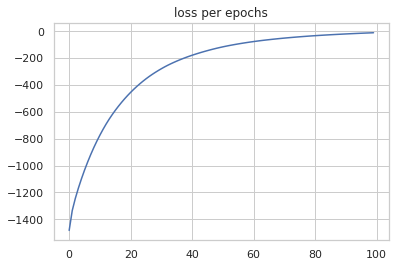

train score: 1.0


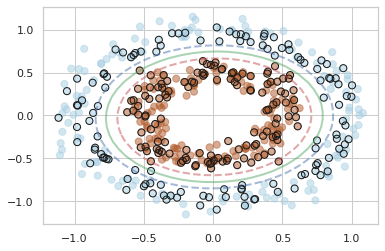

In [14]:
svm = SVMDualProblem(C = 1.0, kernel='poly', degree=2)
svm.fit(X, y, lr = 1e-3)
print("train score:", svm.score(X, y))
svm.plot_decision_boundary()